# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [2]:
pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'google'

### 1. Load the dataset

In [308]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [309]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [298]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [299]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [300]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [301]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [12]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

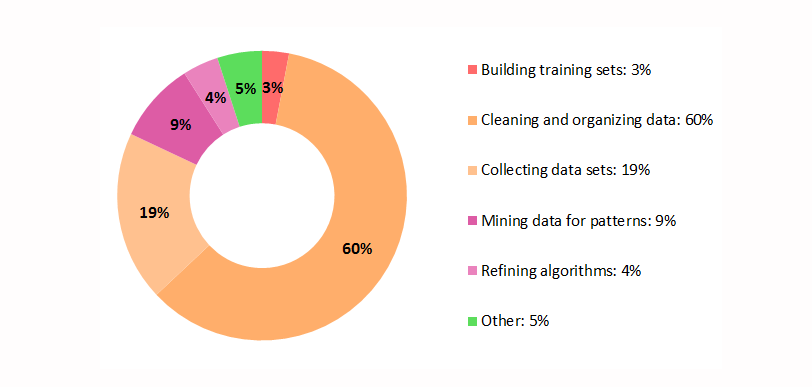

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [20]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [310]:
df_tree = train.drop(["uniqueid"], axis=1)
df_tree.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [311]:
df_cat = pd.get_dummies(df_tree, columns = ['bank_account'], drop_first =True)

In [312]:
def category_chart(var):
    satisfied_counts = df_cat.groupby(var)['bank_account_Yes'].sum()
    unsatisfied_counts = df_cat.groupby(var)['bank_account_Yes'].count() - satisfied_counts
    total_counts = df_cat.groupby(var)['bank_account_Yes'].count()
    
    percent_satisfied = (satisfied_counts / total_counts) * 100
    percent_unsatisfied = (unsatisfied_counts / total_counts) * 100
    
    # create the stacked bar chart
    plt.figure(figsize=(6, 6))
    plt.bar(percent_satisfied.index, percent_satisfied, label='Yes')
    plt.bar(percent_unsatisfied.index, percent_unsatisfied, bottom=percent_satisfied, label='No')
    
    plt.xlabel(var)
    plt.ylabel('% of Customers')
    plt.title('Bank Account Percentage by {}'.format(var))
    
    for i, (satisfied, unsatisfied) in enumerate(zip(percent_satisfied, percent_unsatisfied)):
        plt.text(i, satisfied/2, f'{satisfied:.2f}%', ha='center', va='center')
        plt.text(i, satisfied + unsatisfied/2, f'{unsatisfied:.2f}%', ha='center', va='center')
    
    plt.legend(loc='upper right')
   
    plt.show()




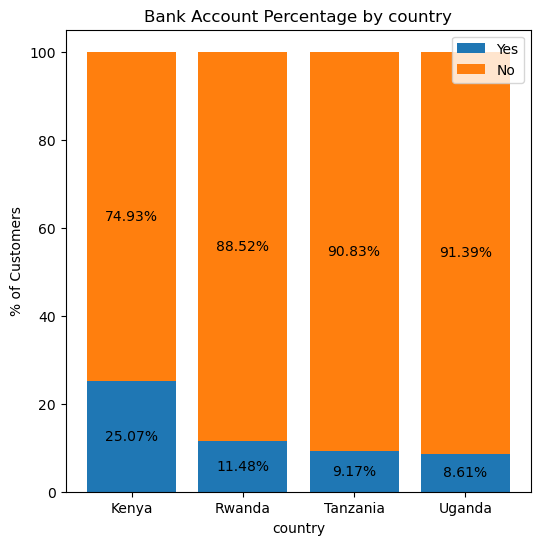

In [202]:
category_chart('country')

In [214]:
category_chart('year')

ValueError: Image size of 507972x853 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

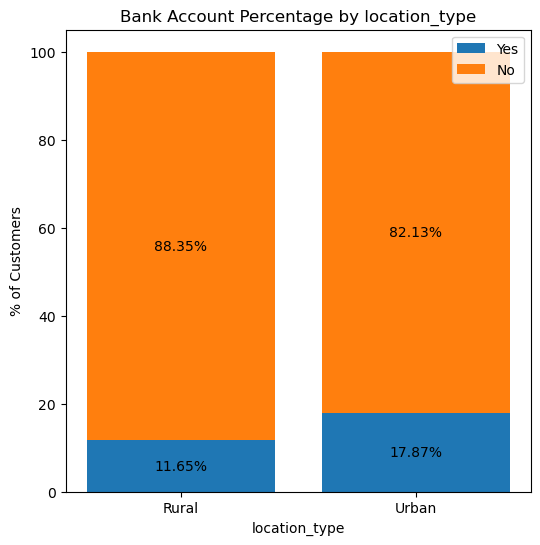

In [204]:
category_chart('location_type')

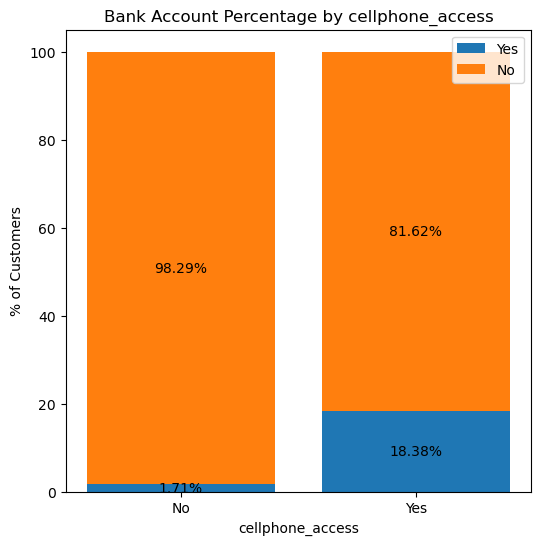

In [205]:
category_chart('cellphone_access')

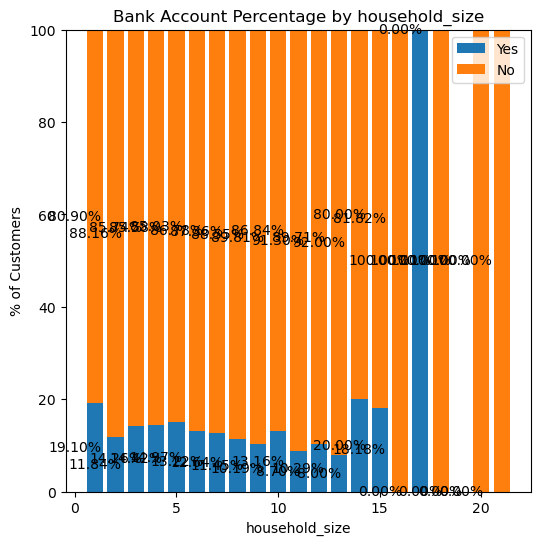

In [206]:
category_chart('household_size')

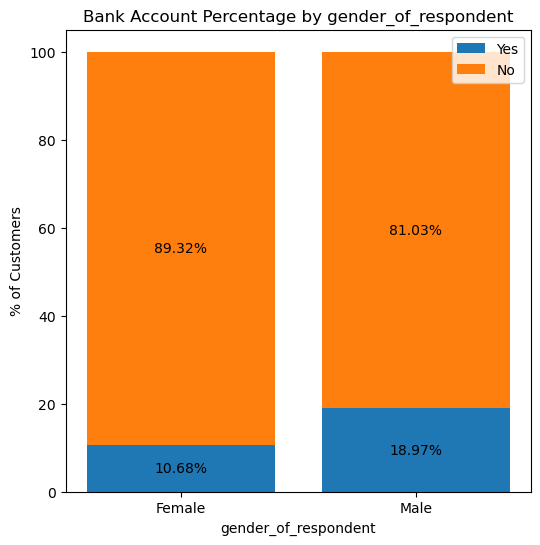

In [207]:
category_chart('gender_of_respondent')

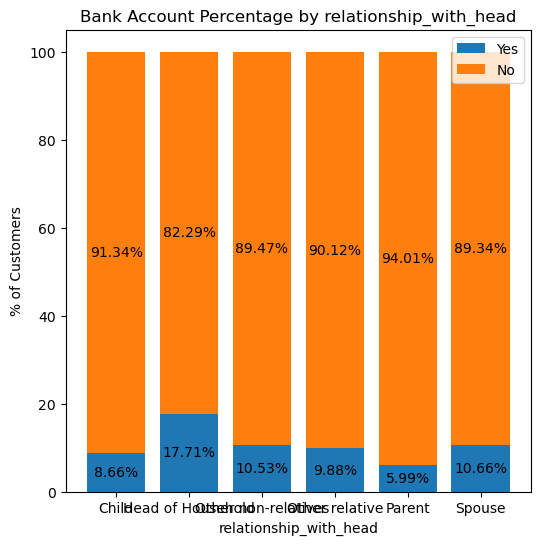

In [208]:
category_chart('relationship_with_head')

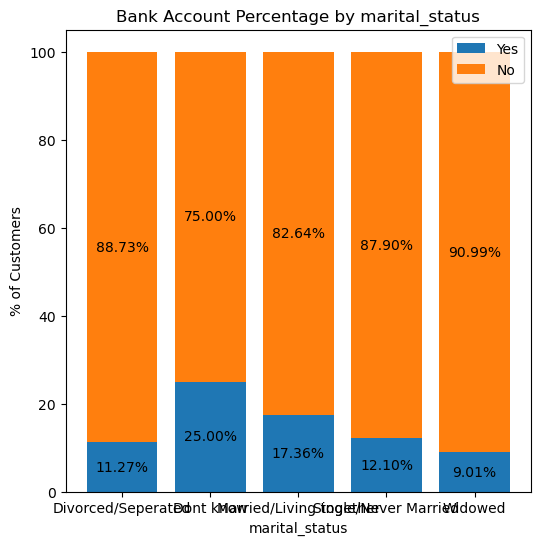

In [210]:
category_chart('marital_status')

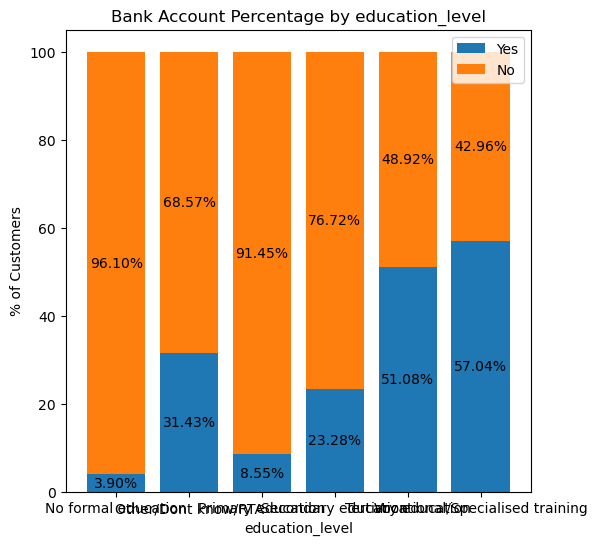

In [211]:
category_chart('education_level')

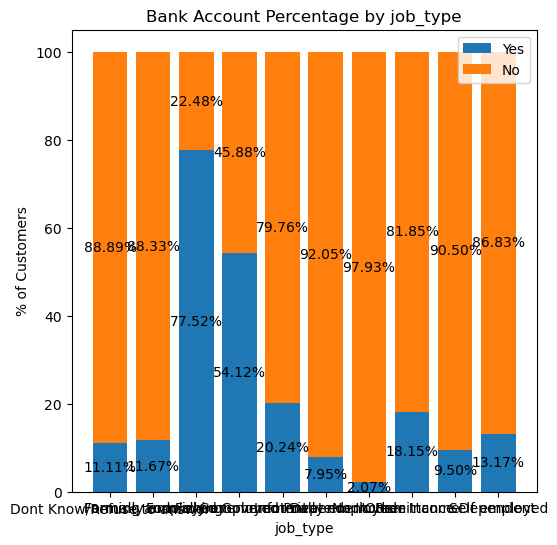

In [212]:
category_chart('job_type')

In [313]:
df_tree = pd.get_dummies(df_tree, columns = ['country','location_type','cellphone_access','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type','bank_account'], drop_first =True)
df_tree.head()

,year,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,bank_account_Yes
0,2018,3,24,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018,5,70,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2018,5,26,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2018,5,34,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2018,8,26,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [359]:
TARGET = 'bank_account_Yes'
X = df_tree.drop(columns='bank_account_Yes')
y =df_tree[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (18819, 32)
X_test.shape: (4705, 32)
y_train.shape: (18819,)
y_test.shape: (4705,)


In [360]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [361]:
# fit a model with default parameters
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# compute performance on test set
y_pred = clf.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))

accuracy score: 0.84
precision score: 0.41
recall score: 0.43
f1 score: 0.42


In [363]:
import time


In [365]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

cv=GridSearchCV(dtc,param_grid=param,n_jobs=-1,cv=5)

# conduct grid search over the parameter space
start_time = time.time()
cv.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params1 = cv.best_params_
cls_params1

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 60,
 'min_samples_split': 50}

In [367]:
# compute performance on test set
model = cv.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.4f' % accuracy_score(y_test,y_pred))
print('precision score: %.4f' % precision_score(y_test,y_pred))
print('recall score: %.4f' % recall_score(y_test,y_pred))
print('f1 score: %.4f' % f1_score(y_test,y_pred))
print('computation time: %.4f' % duration)

accuracy score: 0.8876
precision score: 0.6782
recall score: 0.3349
f1 score: 0.4484
computation time: 40.8549


In [375]:
pip install scikit-optimize

     -------------------------------------- 100.3/100.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [376]:
# imports
import time
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson

In [377]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth':poisson(mu=2,loc=2),
              'min_samples_split':uniform(),
              'max_leaf_nodes':poisson(mu=4,loc=3)}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=100, random_state=42, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*X_train.shape[0])
cls_params2

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 11,
 'min_samples_split': 497.0}

In [378]:
# compute performance on test set
model = r1.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.4f' % accuracy_score(y_test,y_pred))
print('precision score: %.4f' % precision_score(y_test,y_pred))
print('recall score: %.4f' % recall_score(y_test,y_pred))
print('f1 score: %.4f' % f1_score(y_test,y_pred))
print('computation time: %.4f' % duration)

accuracy score: 0.8831
precision score: 0.7323
recall score: 0.2259
f1 score: 0.3452
computation time: 7.5308


In [379]:
# setup parameter space
parameters = {'criterion': Categorical(['gini','entropy']),
              'max_depth': Integer(1,21,prior='log-uniform'),
              'min_samples_split': Real(1e-3,1.0,prior='log-uniform'),
              'max_leaf_nodes': Integer(3,26,prior='uniform')}
              
# create an instance of the bayesian search object
b1 = BayesSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
b1.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params3 = b1.best_params_
cls_params3['min_samples_split'] = np.ceil(cls_params3['min_samples_split']*X_train.shape[0])
cls_params3

OrderedDict([('criterion', 'gini'),
             ('max_depth', 8),
             ('max_leaf_nodes', 23),
             ('min_samples_split', 333.0)])

In [380]:
# compute performance on test set
model = b1.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.4f' % accuracy_score(y_test,y_pred))
print('precision score: %.4f' % precision_score(y_test,y_pred))
print('recall score: %.4f' % recall_score(y_test,y_pred))
print('f1 score: %.4f' % f1_score(y_test,y_pred))
print('computation time: %.4f' % duration)

accuracy score: 0.8876
precision score: 0.6817
recall score: 0.3302
f1 score: 0.4449
computation time: 1.7865


[Text(0.69140625, 0.9545454545454546, 'job_type_Formally employed Private <= 0.5\ngini = 0.243\nsamples = 18819\nvalue = [16149, 2670]\nclass = No'),
 Text(0.49767736486486486, 0.8636363636363636, 'job_type_Formally employed Government <= 0.5\ngini = 0.215\nsamples = 17976\nvalue = [15768, 2208]\nclass = No'),
 Text(0.265625, 0.7727272727272727, 'cellphone_access_Yes <= 0.5\ngini = 0.197\nsamples = 17659\nvalue = [15698, 1961]\nclass = No'),
 Text(0.033783783783783786, 0.6818181818181818, 'job_type_Government Dependent <= 0.5\ngini = 0.032\nsamples = 4788\nvalue = [4710, 78]\nclass = No'),
 Text(0.02027027027027027, 0.5909090909090909, 'gini = 0.027\nsamples = 4690\nvalue = [4626, 64]\nclass = No'),
 Text(0.0472972972972973, 0.5909090909090909, 'education_level_Tertiary education <= 0.5\ngini = 0.245\nsamples = 98\nvalue = [84, 14]\nclass = No'),
 Text(0.033783783783783786, 0.5, 'year <= 2017.5\ngini = 0.219\nsamples = 96\nvalue = [84, 12]\nclass = No'),
 Text(0.02027027027027027, 0.40

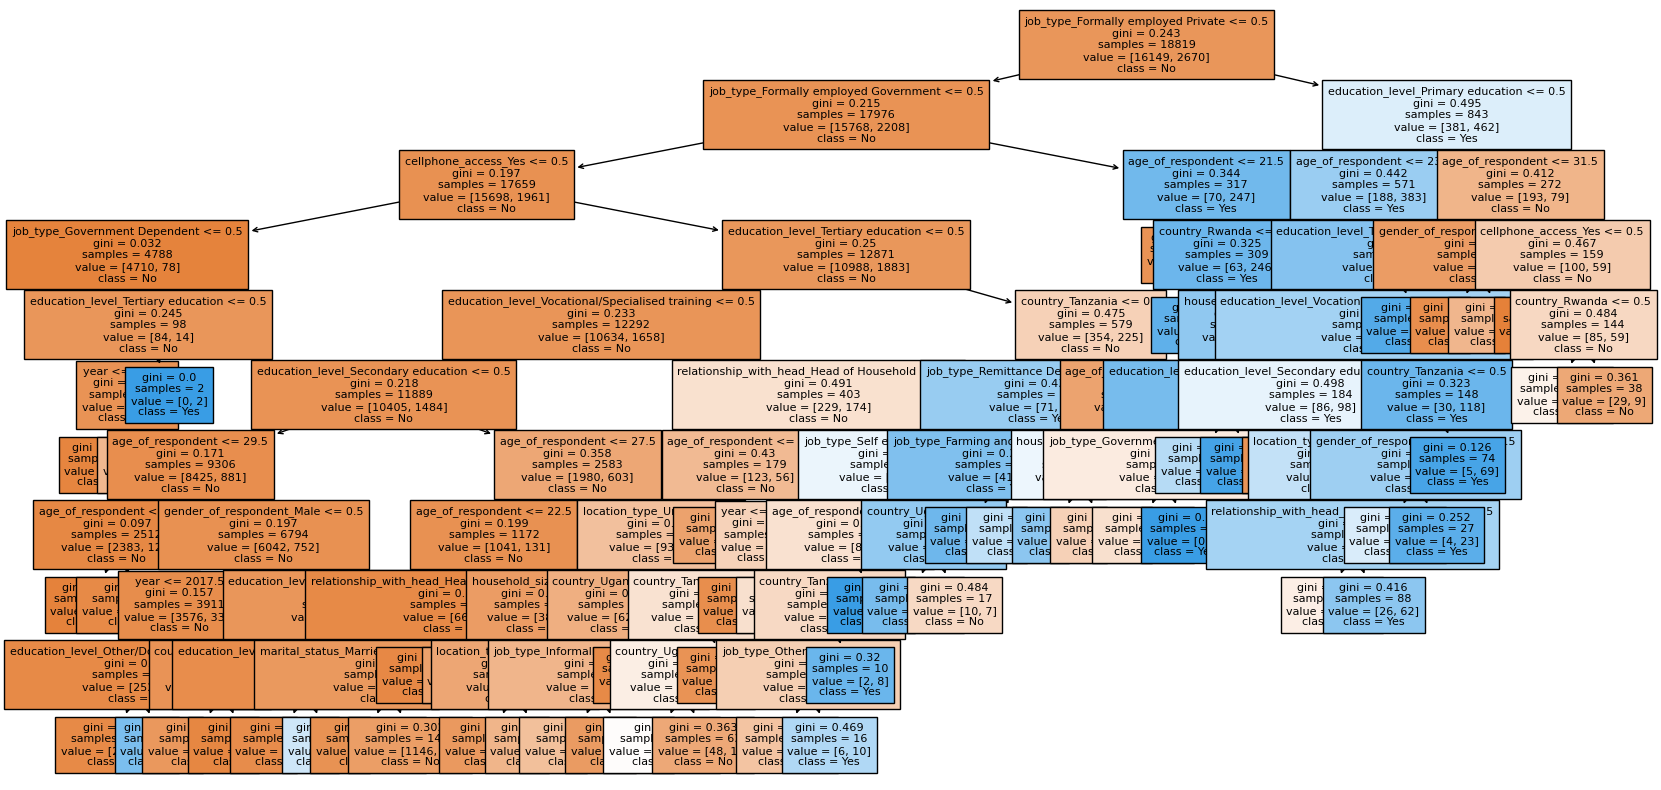

In [394]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#train a very simple model
tree_1 = DecisionTreeClassifier(random_state=0, max_depth=10, criterion='gini',max_leaf_nodes=60,
                                min_samples_split=50) #max_depth limits the tree to one split
tree_1.fit(X_train, y_train)


#let's plot it
fig, axe = plt.subplots(figsize=(20,10))

plot_tree( tree_1, ax = axe, feature_names=X_train.columns,  
                   class_names=['No', 'Yes'],
                      filled=True, fontsize=8
                   )



In [27]:
pip install dmba

  Using cached dmba-0.2.3-py3-none-any.whl (11.8 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [395]:
from dmba import classificationSummary

classificationSummary(y_train, tree_1.predict(X_train))
classificationSummary(y_test, tree_1.predict(X_test))

Confusion Matrix (Accuracy 0.8886)

       Prediction
Actual     0     1
     0 15944   205
     1  1892   778
Confusion Matrix (Accuracy 0.8893)

       Prediction
Actual    0    1
     0 3996   67
     1  454  188


In [396]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

# Calculate Precision, Recall, and F1-score
train_precision = precision_score(y_train, tree_1.predict(X_train))
train_recall = recall_score(y_train, tree_1.predict(X_train))
train_f1 = f1_score(y_train, tree_1.predict(X_train))

test_precision = precision_score(y_test, tree_1.predict(X_test))
test_recall = recall_score(y_test, tree_1.predict(X_test))
test_f1 = f1_score(y_test, tree_1.predict(X_test))

# Print Precision, Recall, and F1-score
print("\nTrain Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1-score:", train_f1)

print("\nTest Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)



Train Precision: 0.7914547304170906
Train Recall: 0.29138576779026215
Train F1-score: 0.4259512729263619

Test Precision: 0.7372549019607844
Test Recall: 0.29283489096573206
Test F1-score: 0.41917502787068


In [384]:
df_tree2 = test.drop(["uniqueid"], axis=1)
df_tree2

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [385]:
df_tree2 = pd.get_dummies(df_tree2, columns = ['country','location_type','cellphone_access','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type'], drop_first =True)


In [386]:
tree_y_model = tree_1.predict(df_tree2)


In [387]:
tree_y_model

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [388]:
# Get the predicted result for the test Data
test.bank_account = tree_y_model

In [389]:
test.bank_account

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [390]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [391]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [392]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
3652,uniqueid_9787 x Rwanda,0
8748,uniqueid_9023 x Tanzania,0
4561,uniqueid_10696 x Rwanda,0
5822,uniqueid_11957 x Rwanda,0
2004,uniqueid_8073 x Kenya,1


Save results in the CSV file.


In [393]:
# Create submission csv file csv file
submission.to_csv('tree_submission.csv', index = False)
#files.download('first_submission.csv') 

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************